In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df = df[['Survived','Pclass','Sex','Age','Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


Cleaning Dataset

In [5]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
dtype: int64

In [15]:
df['Fare'] = df.groupby('Sex')['Fare'].transform(lambda x: x.fillna(x.mean()))


<ipython-input-15-84065395295a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'] = df.groupby('Sex')['Fare'].transform(lambda x: x.fillna(x.mean()))


In [7]:
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-7-a49afafa3b5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))


In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

Changing category column to numerical column


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df['Sex'] = le.fit_transform(df.Sex)

<ipython-input-12-35bdfb9f6d47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df.Sex)


In [25]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


Splitting the data

In [14]:
X = df[['Pclass', 'Sex','Age','Fare']]
y = df['Survived']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1) 


Training the model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
#gini -function to measure a quality of split.
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Checking the accuracy of testing dataset

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
predictions_test = clf.predict(X_test)
accuracy_score(y_test, predictions_test)

1.0

Checking the accuracy of training dataset

In [35]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train, predictions_train)

1.0

visualizing our final decision tree

In [26]:
from sklearn import tree

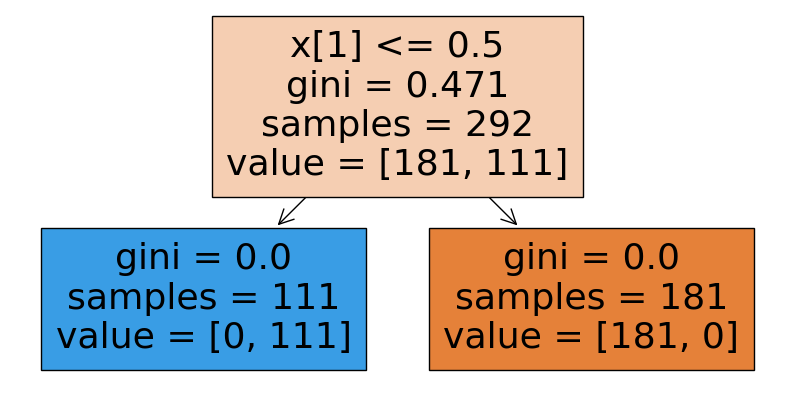

In [27]:
plt.figure(figsize=(10,5))
tree.plot_tree(clf,filled=True)
plt.show()

Finding false positive rate and true positive rate

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [29]:
dt_probs = clf.predict_proba(X_test)[:,1]

In [30]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

PLotting ROC curve for our Decision Tree

In [31]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt


1.0

In [34]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,5))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

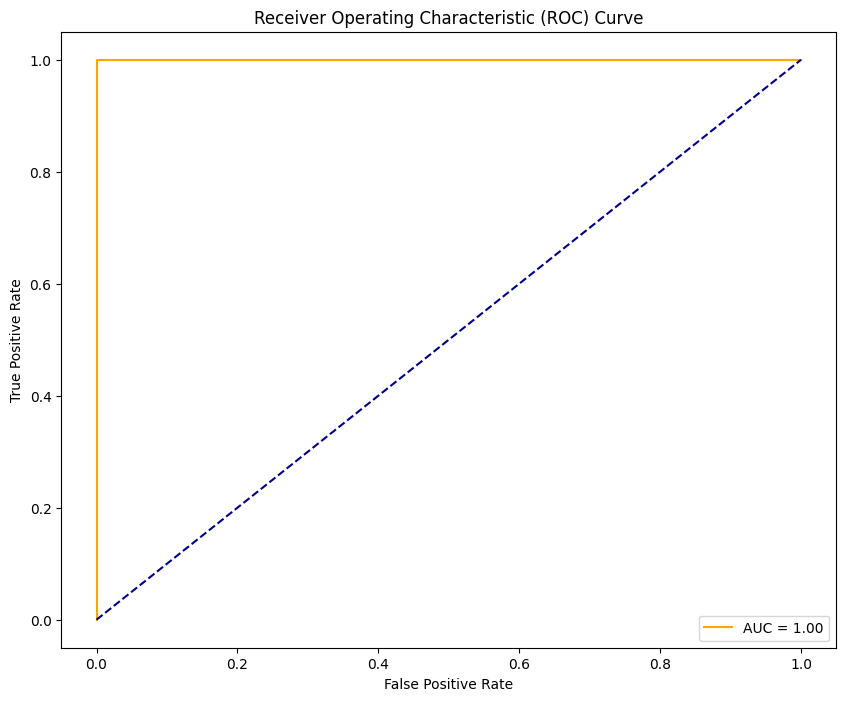

In [33]:
plot_roc_curve(fpr_dt,tpr_dt)

It has ideal measure of separability and perfectly able to distinguish between true positive rate and false positive rate